# Data Science Project 3 - Housing Data Boston 

      1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 Dollars
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

1. Choose variable other than CHAS or MEDV, We will focus or study on what 
    1. mean of x, stdv of x
    2. histogram of X
    3. correlation between X and MEDV
    4. regression, predicting medv from Rooms
   


 
3. assume city planner boston, make random new feature, assume wasnt there. how will it effect median home prices in area, explain the experimental design, discuss group size and power, use stuff from research method course.
    

In [80]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib as plt
import scipy as scp
import statsmodels as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
boscen = pd.read_csv('house.csv')


In [79]:
cavg = np.mean(boscen['CRIM'])
print('Average Crime Rate: ' + str(avg))
medv = np.mean(boscen['MEDV'])                  
chas = np.mean(boscen['CHAS'])
stdv = np.std(boscen['CRIM'])
print('Standard Deviation Crime: ' + str(stdv))

corr = np.corrcoef(boscen['CRIM'], boscen['MEDV'])
print('Correlation Crime and Median Home Value: ' + str(corr))

Average Crime Rate: 3.6135235573122535
Standard Deviation Crime: 8.593041351295769
Correlation Crime and Median Home Value: [[ 1.         -0.38830461]
 [-0.38830461  1.        ]]


Text(0.5, 1.0, 'CRIM')

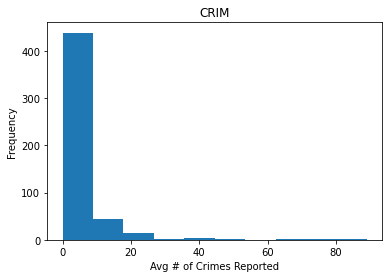

In [46]:
# So the plot appears in line in the noteboook
%matplotlib inline 

sample_mean = np.mean(boscen['CRIM'])
import matplotlib.pyplot as plt
plt.hist(boscen['CRIM'])
plt.xlabel('Avg # of Crimes Reported') 
plt.ylabel('Frequency')
plt.title('CRIM')

In [47]:
boscen.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [152]:
predictors = sm.add_constant(boscen.CRIM, prepend = False)

bc_mod = sm.OLS(boscen.CRIM, predictors)
reg = bc_mod.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.949e+32
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:37:29   Log-Likelihood:                 15842.
No. Observations:                 506   AIC:                        -3.168e+04
Df Residuals:                     504   BIC:                        -3.167e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           1.0000   3.17e-17   3.15e+16      0.0

D:\Anaconda\envs\Project3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2. houses on CHAS will have higher MEDV
    1. what is the null hypothese
    2. p-value, sample mean of the target as an estimate of the population mean.
    3. what is 90% confidence interval for the target price of tracts that border CHAS
    4. effect size cohen's d of .6 if you want 80% what group size is neccasary

In [123]:
bg = boscen.groupby('CHAS')['MEDV'].mean()
print(bg)

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64


null hypotesis

p-value, with sample mean



In [158]:

from scipy import stats
def t_one_sample(samp, mu = 0.0, alpha = 0.1):
    '''Function for two-sided one-sample t test'''
    t_stat = stats.ttest_1samp(samp, mu)
    scale = np.std(samp)
    loc = np.mean(samp)
    ci = stats.t.cdf(alpha/2, len(samp), loc=mu, scale=scale)
    
    print('p-value      < %4.3e' % t_stat[1])
    print('Mean         = %4.3f' % loc)
    
t_one_sample(boscen.MEDV)    




p-value      < 9.371e-216
Mean         = 22.533


Confidence Interval

In [151]:
from scipy import stats
def t_one_sample(samp, mu = 0.0, alpha = 0.1):
    '''Function for two-sided one-sample t test'''
    t_stat = stats.ttest_1samp(samp, mu)
    scale = np.std(samp)
    loc = np.mean(samp)
    ci = stats.t.cdf(alpha/2, len(samp), loc=mu, scale=scale)
    print('Results of one-sample two-sided t test')
    print('Mean         = %4.3f' % loc)
    print('t-Statistic  = %4.3f' % t_stat[0])
    print('p-value      < %4.3e' % t_stat[1])
    print('On degrees of freedom = %4d' % (len(samp) - 1))
    print('Confidence Intervals for alpha =' + str(alpha))
    print('Lower =  %4.3f Upper = %4.3f' % (loc - ci, loc + ci))
    
t_one_sample(boscen.MEDV)    

Results of one-sample two-sided t test
t-Statistic  = 55.111
Confidence Intervals for alpha =0.1
Lower =  22.031 Upper = 23.035


Group size of for power of 80%

In [138]:
from statsmodels.stats.power import tt_ind_solve_power
tt_ind_solve_power(effect_size=0.6, nobs1 = None, alpha=0.05, power=.8, ratio=1, alternative='two-sided')

44.5857902590805